# **Web Scraping & Data Handling Challenge**

# **Website:**
JustWatch - https://www.justwatch.com/in/movies?release_year_from=2000

# **Description:**
JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

# **Tasks:**
1. Web Scraping:

Use BeautifulSoup to scrape the following data from JustWatch:

**a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

**b. TV Show Information:**


     - Release year
     - Genre
    - IMDb rating
    - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
    - URL to the TV show page on JustWatch

**c. Scope:**

     - Scrape data for at least 50 movies and 50 TV shows.
     - You can choose the entry point (e.g., starting with popular movies,
       or a specific genre, etc.) to ensure a diverse dataset.`



**2. Data Filtering & Analysis:**

After scraping the data, use Pandas to perform the following tasks:

**a. Filter movies and TV shows based on specific criteria:**

      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
**b. Data Analysis:**

      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
**3. Data Export:**

   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
Submission:

- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
Note:

Properly handle errors and exceptions during web scraping to ensure a robust script.

Make sure your code is well-structured, easy to understand, and follows Python best practices.

The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.

# **Start The Project**


# **Task 1:- Web Scrapping**

In [3]:
import requests
import json
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time
import random
import csv

# **Scrapping Movies Data**

In [17]:

def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

# **Fetching Movie URL's**

In [18]:
def main_fetch_urls():
    base_url = 'https://www.justwatch.com/in/movies?release_year_from=2022&rating_imdb=7'
    soup = fetch_movie_urls(base_url)

    if soup is None:
        print("Failed to retrieve the page")
        return

    # Extract movie links
    movie_links = soup.find_all('a', href=True, class_='title-list-grid__item--link')
    movie_links = movie_links[:50]  # Limit to the first 50 links

    movie_urls = ['https://www.justwatch.com' + link['href'] for link in movie_links]
    print(movie_urls)

    # Convert to DataFrame
    df = pd.DataFrame(movie_urls, columns=['URL'])
    df.to_csv('justwatch_movies.csv', index=False)
    print('Data has been saved to justwatch_movies.csv')

if __name__ == "__main__":
    main_fetch_urls()

['https://www.justwatch.com/in/movie/chaava', 'https://www.justwatch.com/in/movie/conclave', 'https://www.justwatch.com/in/movie/hit-3', 'https://www.justwatch.com/in/movie/veera-dheera-sooran-part-2', 'https://www.justwatch.com/in/movie/the-diplomat', 'https://www.justwatch.com/in/movie/sikandar-2025', 'https://www.justwatch.com/in/movie/raid-2', 'https://www.justwatch.com/in/movie/alappuzha-gymkhana', 'https://www.justwatch.com/in/movie/dragon-2025', 'https://www.justwatch.com/in/movie/court-state-vs-a-nobody', 'https://www.justwatch.com/in/movie/sinners-2025', 'https://www.justwatch.com/in/movie/odela2', 'https://www.justwatch.com/in/movie/heretic', 'https://www.justwatch.com/in/movie/thunderbolts', 'https://www.justwatch.com/in/movie/superboys-of-malegaon', 'https://www.justwatch.com/in/movie/flow-2024', 'https://www.justwatch.com/in/movie/thudarum', 'https://www.justwatch.com/in/movie/vadakkan', 'https://www.justwatch.com/in/movie/phule', 'https://www.justwatch.com/in/movie/missio

# **Scrapping Movie Title**

In [7]:
def fetch_movie_title(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return 'Title not found'
    soup = BeautifulSoup(response.text, 'html.parser')

    # Check the first path
    title_tag = soup.find('h1', class_='title-detail-hero__details__title has-original-title')
    if title_tag:
        title = title_tag.contents[0].strip()
    else:
        # Check the second path if the first one is not found
        title_tag = soup.find('h1', class_='title-detail-hero__details__title')
        title = title_tag.contents[0].strip() if title_tag else 'Title not found'

    return title
def main_append_titles():
    # Read the CSV file with movie URLs
    df = pd.read_csv('justwatch_movies.csv')

    titles = []
    for url in df['URL']:
        title = fetch_movie_title(url)
        print(title)
        titles.append(title)

    # Add the titles to the DataFrame
    df['Title'] = titles

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_movies.csv', index=False)
    print('Data has been saved to justwatch_movies.csv')

if __name__ == "__main__":
    main_append_titles()

Chhaava
Conclave
HIT: The Third Case
Veera Dheera Sooran: Part 2
Sikandar
The Diplomat
Raid 2
Alappuzha Gymkhana
Dragon
Court - State Vs. A Nobody
Sinners
Odela 2
Heretic
Superboys of Malegaon
Thunderbolts*
Flow
Thudarum
Vadakkan
Phule
Anora
Nosferatu
Mission: Impossible - Dead Reckoning Part One
HIT: The 2nd Case
Lucky Baskhar
Teri Baaton Mein Aisa Uljha Jiya
Officer on Duty
The Substance
Santosh
Warfare
K.G.F: Chapter 2
Rekhachithram
The Brutalist
Tourist Family
Drishyam 2
Retro
Girls Will Be Girls
Final Destination Bloodlines
Top Gun: Maverick
The Accountant²
Ground Zero
We Live in Time
The Wild Robot
Sam Bahadur
Last Night of Amore
Kudumbasthan
Ponman
Dominic and the Ladies' Purse
Mad
Love Today
Oppenheimer
Data has been saved to justwatch_movies.csv


# **Scrapping release Year**

In [10]:
def fetch_release_year(url, retries=5):
    headers = [
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36'}
    ]

    for i in range(retries):
        try:
            headers_choice = random.choice(headers)
            response = requests.get(url, headers=headers_choice)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')

            # Check the first path
            title_tag = soup.find('h1', class_='title-detail-hero__details__title has-original-title')
            if title_tag:
                year_tag = title_tag.find('span', class_='release-year')
            else:
                # Check the second path if the first one is not found
                title_tag = soup.find('h1', class_='title-detail-hero__details__title')
                year_tag = title_tag.find('span', class_='release-year') if title_tag else None

            if year_tag:
                year = year_tag.get_text(strip=True).strip('()')
            else:
                year = 'Year not found'

            return year

        except requests.RequestException as e:
            if response.status_code == 429:  # Rate limit exceeded
                delay = 2 ** i + random.uniform(0, 1)  # Exponential backoff with jitter
                print(f"Rate limit exceeded, retrying in {delay:.1f} seconds...")
                time.sleep(delay)
            else:
                print(f"Request error for URL {url}: {e}")
                return 'Year not found'
        except Exception as e:
            print(f"Error processing URL {url}: {e}")
            return 'Year not found'

def main_append_years():
    # Read the CSV file with TV show URLs
    df = pd.read_csv('justwatch_movies.csv')

    years = []
    for url in df['URL']:
        year = fetch_release_year(url)
        years.append(year)
        time.sleep(random.uniform(1, 2))


    # Add the years to the DataFrame
    df['Release Year'] = years
    print(df['Release Year'])

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_movies.csv', index=False)
    print('Data has been saved to justwatch_movies.csv')

if __name__ == "__main__":
    main_append_years()


0     2025
1     2024
2     2025
3     2025
4     2025
5     2025
6     2025
7     2025
8     2025
9     2025
10    2025
11    2025
12    2024
13    2025
14    2025
15    2024
16    2025
17    2025
18    2025
19    2024
20    2024
21    2023
22    2022
23    2024
24    2024
25    2025
26    2024
27    2024
28    2025
29    2022
30    2025
31    2024
32    2025
33    2022
34    2025
35    2024
36    2025
37    2022
38    2025
39    2025
40    2024
41    2024
42    2023
43    2023
44    2025
45    2025
46    2025
47    2023
48    2022
49    2023
Name: Release Year, dtype: object
Data has been saved to justwatch_movies.csv


# **Scrapping Genres**

In [13]:


def fetch_genre(url):
    headers = {
        'User-Agent': 'Mozilla/5.0'
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, 'html.parser')

        genre_text = 'NA'

        # First try: find any div containing the word "Genre"
        genre_section = soup.find('div', string=re.compile(r'Genre', re.I))
        if genre_section:
            genre_container = genre_section.find_next()
            if genre_container:
                genre_text = genre_container.get_text(strip=True)

        # Fallback: search for genre-like content in known classes
        if genre_text == 'NA':
            possible_divs = soup.find_all('div', class_=re.compile("detail-infos__value|text-muted|info-item", re.I))
            for div in possible_divs:
                if any(genre in div.text for genre in ['Action', 'Drama', 'Comedy', 'Thriller', 'Romance', 'Horror']):
                    genre_text = div.get_text(strip=True)
                    break

    except Exception as e:
        print(f"Error fetching genre for {url}: {e}")
        genre_text = 'NA'

    return genre_text

def main():
    # Load your existing movie CSV
    df = pd.read_csv('justwatch_movies.csv')

    # Add a new column for Genre if not present
    if 'Genre' not in df.columns:
        df['Genre'] = ''

    # Fetch and update genre
    for i, row in df.iterrows():
        url = row['URL']
        genre = fetch_genre(url)
        df.at[i, 'Genre'] = genre
        print(f"{url} → Genre: {genre}")

    # Save updated CSV
    df.to_csv('justwatch_movies.csv', index=False)
    print('Genres have been appended to justwatch_movies.csv')

if __name__ == "__main__":
    main()


https://www.justwatch.com/in/movie/chaava → Genre: Drama, History, Action & Adventure,Period Drama
https://www.justwatch.com/in/movie/conclave → Genre: Drama,Mystery Thriller
https://www.justwatch.com/in/movie/hit-3 → Genre: Crime, Mystery & Thriller, Action & Adventure,Action Thriller
https://www.justwatch.com/in/movie/veera-dheera-sooran-part-2 → Genre: Action & Adventure, Crime, Drama, Mystery & Thriller,Bollywood
https://www.justwatch.com/in/movie/sikandar-2025 → Genre: Action & Adventure, Mystery & Thriller, Drama
https://www.justwatch.com/in/movie/the-diplomat → Genre: Drama,Mystery Thriller
https://www.justwatch.com/in/movie/raid-2 → Genre: Crime, Drama, Mystery & Thriller,Bollywood
https://www.justwatch.com/in/movie/alappuzha-gymkhana → Genre: Action & Adventure, Drama, Comedy,Dramedy,Action Comedy
https://www.justwatch.com/in/movie/dragon-2025 → Genre: Comedy, Drama, Romance,RomCom
https://www.justwatch.com/in/movie/court-state-vs-a-nobody → Genre: Drama, Romance, Crime,Courtr

# **Scrapping IMBD Rating**

In [15]:
def fetch_imdb_rating(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the IMDb rating
    imdb_rating = soup.find('img', alt='IMDB')
    if imdb_rating:
        rating_div = imdb_rating.find_next('div')
        imdb_rating_value = rating_div.text.strip() if rating_div else 'Not Available'

        # Remove any content within parentheses
        imdb_rating_value = re.sub(r'', '', imdb_rating_value).strip()
    else:
        imdb_rating_value = 'Not Available'

    return imdb_rating_value

def main():
    # Load URLs from CSV file
    df = pd.read_csv('justwatch_movies.csv')

    # Add a new column for IMDb ratings
    df['IMDB Rating'] = ''

    # Fetch IMDb rating for each URL
    for i, row in df.iterrows():
        url = row['URL']
        imdb_rating = fetch_imdb_rating(url)
        df.at[i, 'IMDB Rating'] = imdb_rating
        print(f"{url} → Genre: {imdb_rating}")

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_movies.csv', index=False)
    print('IMDb ratings have been appended to justwatch_movies.csv')

# Run the script
if __name__ == "__main__":
    main()


https://www.justwatch.com/in/movie/chaava → Genre: 7.4  (31k)
https://www.justwatch.com/in/movie/conclave → Genre: 7.4  (184k)
https://www.justwatch.com/in/movie/hit-3 → Genre: 7.4  (4k)
https://www.justwatch.com/in/movie/veera-dheera-sooran-part-2 → Genre: 6.9  (5k)
https://www.justwatch.com/in/movie/sikandar-2025 → Genre: 7.5  (48k)
https://www.justwatch.com/in/movie/the-diplomat → Genre: 7.6  (9k)
https://www.justwatch.com/in/movie/raid-2 → Genre: 8.9  (22k)
https://www.justwatch.com/in/movie/alappuzha-gymkhana → Genre: 8.0  (2k)
https://www.justwatch.com/in/movie/dragon-2025 → Genre: 7.9  (11k)
https://www.justwatch.com/in/movie/court-state-vs-a-nobody → Genre: 7.9  (6k)
https://www.justwatch.com/in/movie/sinners-2025 → Genre: 8.1  (96k)
https://www.justwatch.com/in/movie/odela2 → Genre: 6.0  (5k)
https://www.justwatch.com/in/movie/heretic → Genre: 7.0  (145k)
https://www.justwatch.com/in/movie/superboys-of-malegaon → Genre: 7.8  (4k)
https://www.justwatch.com/in/movie/thunderbolts

# **Scrapping Runtime/Duration**

In [16]:
def fetch_runtime(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the runtime
    runtime = soup.find('h3', string='Runtime')
    if runtime:
        runtime_value = runtime.find_next('div').text.strip() if runtime.find_next('div') else 'Not Available'
    else:
        runtime_value = 'Not Available'

    return runtime_value

def main():
    # Load URLs from CSV file
    df = pd.read_csv('justwatch_movies.csv')

    # Add a new column for runtime
    df['Runtime'] = ''

    # Fetch runtime for each URL
    for i, row in df.iterrows():
        url = row['URL']
        runtime = fetch_runtime(url)
        df.at[i, 'Runtime'] = runtime
        print(f"{url} → runtime: {runtime}")

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_movies.csv', index=False)
    print('Runtime has been appended to justwatch_movies.csv')

# Run the script
if __name__ == "__main__":
    main()

https://www.justwatch.com/in/movie/chaava → runtime: 2h 41min
https://www.justwatch.com/in/movie/conclave → runtime: 2h 0min
https://www.justwatch.com/in/movie/hit-3 → runtime: 2h 37min
https://www.justwatch.com/in/movie/veera-dheera-sooran-part-2 → runtime: 2h 42min
https://www.justwatch.com/in/movie/sikandar-2025 → runtime: 2h 28min
https://www.justwatch.com/in/movie/the-diplomat → runtime: 2h 10min
https://www.justwatch.com/in/movie/raid-2 → runtime: 2h 25min
https://www.justwatch.com/in/movie/alappuzha-gymkhana → runtime: 2h 20min
https://www.justwatch.com/in/movie/dragon-2025 → runtime: 2h 37min
https://www.justwatch.com/in/movie/court-state-vs-a-nobody → runtime: 2h 35min
https://www.justwatch.com/in/movie/sinners-2025 → runtime: 2h 17min
https://www.justwatch.com/in/movie/odela2 → runtime: 2h 30min
https://www.justwatch.com/in/movie/heretic → runtime: 1h 51min
https://www.justwatch.com/in/movie/superboys-of-malegaon → runtime: 2h 10min
https://www.justwatch.com/in/movie/thunderb

# **Scrapping Age Rating**

In [18]:
def fetch_age_rating(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the age rating
    age_rating = soup.find('h3', string='Age rating')
    if age_rating:
        age_rating_value = age_rating.find_next('div').text.strip() if age_rating.find_next('div') else 'Not Available'
    else:
        age_rating_value = 'Not Available'

    return age_rating_value

def main():
    # Load URLs from CSV file
    df = pd.read_csv('justwatch_movies.csv')

    # Add a new column for age rating
    df['Age Rating'] = ''

    # Fetch age rating for each URL
    for i, row in df.iterrows():
        url = row['URL']
        age_rating = fetch_age_rating(url)
        df.at[i, 'Age Rating'] = age_rating
        print(f"{url} → age_rating: {age_rating}")

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_movies.csv', index=False)
    print('Age rating has been appended to justwatch_movies.csv')

# Run the script
if __name__ == "__main__":
    main()

https://www.justwatch.com/in/movie/chaava → age_rating: A
https://www.justwatch.com/in/movie/conclave → age_rating: Not Available
https://www.justwatch.com/in/movie/hit-3 → age_rating: A
https://www.justwatch.com/in/movie/veera-dheera-sooran-part-2 → age_rating: Not Available
https://www.justwatch.com/in/movie/sikandar-2025 → age_rating: Not Available
https://www.justwatch.com/in/movie/the-diplomat → age_rating: Not Available
https://www.justwatch.com/in/movie/raid-2 → age_rating: Not Available
https://www.justwatch.com/in/movie/alappuzha-gymkhana → age_rating: Not Available
https://www.justwatch.com/in/movie/dragon-2025 → age_rating: Not Available
https://www.justwatch.com/in/movie/court-state-vs-a-nobody → age_rating: Not Available
https://www.justwatch.com/in/movie/sinners-2025 → age_rating: A
https://www.justwatch.com/in/movie/odela2 → age_rating: A
https://www.justwatch.com/in/movie/heretic → age_rating: A
https://www.justwatch.com/in/movie/superboys-of-malegaon → age_rating: Not 

## **Fetching Production Countries Details**

In [19]:
USER_AGENTS = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:92.0) Gecko/20100101 Firefox/92.0',
    # Add more User-Agent strings here
]

def fetch_production_country(url):
    try:
        headers = {'User-Agent': random.choice(USER_AGENTS)}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the  element and check if it contains "Production country" in a case-insensitive way
        h3_elements = soup.find_all('h3', class_='detail-infos__subheading')
        production_country_div = None

        for h3 in h3_elements:
            if re.search('Production country', h3.get_text(), re.IGNORECASE):
                production_country_div = h3.find_next_sibling('div', class_='detail-infos__value')
                break

        if production_country_div:
            return production_country_div.get_text(strip=True)
        return None
    except Exception as e:
        print(f"Error fetching production country for URL {url}: {e}")
        return None

def main_append_production_countries():
    # Read the CSV file with movie URLs
    df = pd.read_csv('justwatch_movies.csv')

    # Initialize a list to store the production countries
    production_countries = []

    # Iterate over each URL and fetch the production country
    for url in df['URL']:
        production_country = fetch_production_country(url)
        production_countries.append(production_country)

        # Introduce a random delay between 1 and 2 seconds to avoid being blocked
        time.sleep(random.uniform(1, 2))

    # Add the production country column to the DataFrame
    df['Production Country'] = production_countries
    print(df['Production Country'])

    # Save the updated DataFrame back to CSV
    df.to_csv('justwatch_movies.csv', index=False)

    print("Production country data has been added to justwatch_movies.csv")

if __name__ == "__main__":
    main_append_production_countries()


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
Name: Production Country, dtype: object
Production country data has been added to justwatch_movies.csv


## **Fetching Production Countries Details**

In [20]:
USER_AGENTS = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:92.0) Gecko/20100101 Firefox/92.0',
    # Add more User-Agent strings here
]

def fetch_streaming_platforms(url):
    try:
        headers = {'User-Agent': random.choice(USER_AGENTS)}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the  tag with name="description"
        meta_tag = soup.find('meta', attrs={'name': 'description'})
        if meta_tag:
            content = meta_tag.get('content', '')
            # Extract platform names using regex
            platforms = re.findall(r'\b(?:Netflix|Prime Video|Apple TV Plus|Crunchyroll|Hotstar|Jio Cinema|Zee5|MUBI|Sony Liv|YouTube|GuideDoc|Netflix Kids|Yupp TV|Sun Nxt|Hungama Play|Alt Balaji|Curiosity Stream|ShemarooMe|DOCSVILLE|Tata Play|Discovery+|ManoramaMax|aha|WOW Presents Plus|Magellan TV|BroadwayHD|Lionsgate Play|Dekkoo|True Story)\b', content)
            return ', '.join(platforms) if platforms else None
        return None
    except Exception as e:
        print(f"Error fetching streaming platforms for URL {url}: {e}")
        return None

def main_append_streaming_platforms():
    # Read the CSV file with movie URLs
    df = pd.read_csv('justwatch_movies.csv')

    # Initialize a list to store the streaming platforms
    platforms_list = []

    # Iterate over each URL and fetch the streaming platforms
    for url in df['URL']:
        platforms = fetch_streaming_platforms(url)
        platforms_list.append(platforms)

        # Introduce a random delay between 1 and 5 seconds to avoid being blocked
        time.sleep(random.uniform(1, 2))

    # Add the platforms column to the DataFrame
    df['Platforms'] = platforms_list
    print(df['Platforms'])

    # Save the updated DataFrame back to CSV
    df.to_csv('justwatch_movies.csv', index=False)

    print("Streaming platforms data has been added to justwatch_movies.csv")

if __name__ == "__main__":
    main_append_streaming_platforms()


0     Netflix, Prime Video, Hotstar
1     Netflix, Prime Video, Hotstar
2              Netflix, Prime Video
3              Netflix, Prime Video
4     Netflix, Prime Video, Hotstar
5     Netflix, Prime Video, Hotstar
6     Netflix, Prime Video, Hotstar
7              Netflix, Prime Video
8     Netflix, Prime Video, Hotstar
9              Netflix, Prime Video
10    Netflix, Prime Video, Hotstar
11    Netflix, Prime Video, Hotstar
12    Netflix, Prime Video, Hotstar
13             Netflix, Prime Video
14             Netflix, Prime Video
15    Netflix, Prime Video, Hotstar
16    Netflix, Prime Video, Hotstar
17    Netflix, Prime Video, Hotstar
18    Netflix, Prime Video, Hotstar
19    Netflix, Prime Video, Hotstar
20    Netflix, Prime Video, Hotstar
21                          Netflix
22             Netflix, Prime Video
23             Netflix, Prime Video
24             Netflix, Prime Video
25             Netflix, Prime Video
26             Netflix, Prime Video
27    Netflix, Prime Video, 

# **Now Creating Movies DataFrame**

In [21]:
movies_data = pd.read_csv('justwatch_movies.csv')
movies_data.head(3)

,URL,Title,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Country,Platforms
0,https://www.justwatch.com/in/movie/chaava,Chhaava,2025,"Drama, History, Action & Adventure,Period Drama",7.4 (31k),2h 41min,A,NaN,"Netflix, Prime Video, Hotstar"
1,https://www.justwatch.com/in/movie/conclave,Conclave,2024,"Drama,Mystery Thriller",7.4 (184k),2h 0min,Not Available,NaN,"Netflix, Prime Video, Hotstar"
2,https://www.justwatch.com/in/movie/hit-3,HIT: The Third Case,2025,"Crime, Mystery & Thriller, Action & Adventure,...",7.4 (4k),2h 37min,A,NaN,"Netflix, Prime Video"


# **Scraping TV Show Data**

In [4]:
def fetch_tv_shows_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return None
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


# **Fetching Tv shows Url details**

In [5]:
def main_fetch_urls():
    base_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2022&rating_imdb=7'
    soup = fetch_tv_shows_urls(base_url)

    if soup is None:
        print("Failed to retrieve the page")
        return

    # Extract TV show links
    tv_show_links = soup.find_all('a', href=True, class_='title-list-grid__item--link')
    tv_show_links = tv_show_links[:50]  # Limit to the first 50 links

    tv_show_urls = ['https://www.justwatch.com' + link['href'] for link in tv_show_links]
    print(tv_show_urls)

    # Convert to DataFrame
    df = pd.DataFrame(tv_show_urls, columns=['URL'])
    df.to_csv('justwatch_data(tv).csv', index=False)
    print('Data has been saved to justwatch_data(tv).csv')

if __name__ == "__main__":
    main_fetch_urls()


['https://www.justwatch.com/in/tv-show/the-last-of-us', 'https://www.justwatch.com/in/tv-show/khauf', 'https://www.justwatch.com/in/tv-show/el-eternauta', 'https://www.justwatch.com/in/tv-show/weak-hero', 'https://www.justwatch.com/in/tv-show/from', 'https://www.justwatch.com/in/tv-show/solo-leveling-2024', 'https://www.justwatch.com/in/tv-show/gram-chikitsalay', 'https://www.justwatch.com/in/tv-show/adolescence-2025', 'https://www.justwatch.com/in/tv-show/farzi', 'https://www.justwatch.com/in/tv-show/mobland', 'https://www.justwatch.com/in/tv-show/the-day-of-the-jackal', 'https://www.justwatch.com/in/tv-show/suzhal-the-vortex', 'https://www.justwatch.com/in/tv-show/daredevil-born-again', 'https://www.justwatch.com/in/tv-show/jack-reacher', 'https://www.justwatch.com/in/tv-show/andor', 'https://www.justwatch.com/in/tv-show/the-four-seasons', 'https://www.justwatch.com/in/tv-show/the-studio', 'https://www.justwatch.com/in/tv-show/wind-breaker', 'https://www.justwatch.com/in/tv-show/seve

# **Fetching Tv Show Title details**

In [7]:
def fetch_movie_title(url, retries=5):
    headers_list = [
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36'}
    ]

    for i in range(retries):
        try:
            headers = random.choice(headers_list)
            response = requests.get(url, headers=headers)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')

            # Check the path with class ending in 'data-v-f0af2e1e'
            title_tag = soup.find('h1', class_=lambda x: x and x.endswith('data-v-f0af2e1e'))
            if title_tag:
                title = title_tag.contents[0].strip()
            else:
                # Check the path with 'has-original-title'
                title_tag = soup.find('h1', class_='title-detail-hero__details__title has-original-title')
                if title_tag:
                    title = title_tag.contents[0].strip()
                else:
                    # Check the default path
                    title_tag = soup.find('h1', class_='title-detail-hero__details__title')
                    title = title_tag.contents[0].strip() if title_tag else 'Title not found'

            return title

        except requests.RequestException as e:
            if response.status_code == 429:  # Rate limit exceeded
                delay = 2 ** i + random.uniform(0, 1)  # Exponential backoff with jitter
                print(f"Rate limit exceeded, retrying in {delay:.1f} seconds...")
                time.sleep(delay)
            else:
                print(f"Request error for URL {url}: {e}")
                return 'Title not found'
        except Exception as e:
            print(f"Error processing URL {url}: {e}")
            return 'Title not found'

def main_append_titles():
    # Read the CSV file with movie URLs
    df = pd.read_csv('justwatch_data(tv).csv')

    titles = []
    for url in df['URL']:
        title = fetch_movie_title(url)
        titles.append(title)

    # Add the titles to the DataFrame
    df['Title'] = titles
    print(df['Title'])

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_data(tv).csv', index=False)
    print('Data has been saved to justwatch_data(tv).csv')

if __name__ == "__main__":
    main_append_titles()


0                                       The Last of Us
1                                                Khauf
2                                         The Eternaut
3                                            Weak Hero
4                                                 From
5                                        Solo Leveling
6                                     Gram Chikitsalay
7                                          Adolescence
8                                                Farzi
9                                              MobLand
10                               The Day of the Jackal
11                                 Suzhal - The Vortex
12                               Daredevil: Born Again
13                                             Reacher
14                                               Andor
15                                    The Four Seasons
16                                          The Studio
17                                        Wind Breaker
18        

# **Fetching Release Year**

In [8]:
def fetch_release_year(url, retries=5):
    headers_list = [
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36'},
        {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36'}
    ]

    for i in range(retries):
        try:
            headers = random.choice(headers_list)
            response = requests.get(url, headers=headers)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')

            # Check the first path
            title_tag = soup.find('h1', class_='title-detail-hero__details__title')
            if title_tag:
                year_tag = title_tag.find('span', class_='release-year')
            else:
                # Check the second path if the first one is not found
                title_tag = soup.find('h1', class_='title-detail-hero__details__title has-original-title', attrs={'data-v-f0af2e1e': True})
                year_tag = title_tag.find('span', class_='release-year') if title_tag else None

            year = year_tag.get_text(strip=True).strip('()') if year_tag else 'Year not found'
            return year

        except requests.RequestException as e:
            if response.status_code == 429:  # Rate limit exceeded
                delay = 2 ** i + random.uniform(0, 1)  # Exponential backoff with jitter
                print(f"Rate limit exceeded, retrying in {delay:.1f} seconds...")
                time.sleep(delay)
            else:
                print(f"Request error for URL {url}: {e}")
                return 'Year not found'
        except Exception as e:
            print(f"Error processing URL {url}: {e}")
            return 'Year not found'

def main_append_years():
    # Read the CSV file with movie URLs
    df = pd.read_csv('justwatch_data(tv).csv')

    years = []
    for url in df['URL']:
        year = fetch_release_year(url)
        years.append(year)

    # Add the years to the DataFrame
    df['Release Year'] = years
    print(df['Release Year'])

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_data(tv).csv', index=False)
    print('Data has been saved to justwatch_data(tv).csv')

if __name__ == "__main__":
    main_append_years()

0     2023
1     2025
2     2025
3     2022
4     2022
5     2024
6     2025
7     2025
8     2023
9     2025
10    2024
11    2022
12    2025
13    2022
14    2022
15    2025
16    2025
17    2024
18    2022
19    2024
20    2023
21    2025
22    2025
23    2023
24    2023
25    2024
26    2025
27    2025
28    2022
29    2025
30    2023
31    2025
32    2024
33    2024
34    2025
35    2022
36    2025
37    2023
38    2024
39    2025
40    2022
41    2023
42    2022
43    2023
44    2025
45    2022
46    2025
47    2024
48    2022
49    2025
Name: Release Year, dtype: object
Data has been saved to justwatch_data(tv).csv


## **# Fetching TV Show Genre Details**

In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

def fetch_genre(url):
    headers = {
        'User-Agent': 'Mozilla/5.0'
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(response.text, 'html.parser')

        genre_text = 'NA'

        # First try: find any div containing the word "Genre"
        genre_section = soup.find('div', string=re.compile(r'Genre', re.I))
        if genre_section:
            genre_container = genre_section.find_next()
            if genre_container:
                genre_text = genre_container.get_text(strip=True)

        # Fallback: search for genre-like content in known classes
        if genre_text == 'NA':
            possible_divs = soup.find_all('div', class_=re.compile("detail-infos__value|text-muted|info-item", re.I))
            for div in possible_divs:
                if any(genre in div.text for genre in ['Action', 'Drama', 'Comedy', 'Thriller', 'Romance', 'Horror']):
                    genre_text = div.get_text(strip=True)
                    break

    except Exception as e:
        print(f"Error fetching genre for {url}: {e}")
        genre_text = 'NA'

    return genre_text

def main():
    # Load your existing movie CSV
    df = pd.read_csv('justwatch_data(tv).csv')

    # Add a new column for Genre if not present
    if 'Genre' not in df.columns:
        df['Genre'] = ''

    # Fetch and update genre
    for i, row in df.iterrows():
        url = row['URL']
        genre = fetch_genre(url)
        df.at[i, 'Genre'] = genre
        print(f"{url} → Genre: {genre}")

    # Save updated CSV
    df.to_csv('justwatch_data(tv).csv', index=False)
    print('Genres have been appended to justwatch_data(tv).csv')

if __name__ == "__main__":
    main()


https://www.justwatch.com/in/tv-show/the-last-of-us → Genre: Drama, Action & Adventure, Horror, Science-Fiction, Mystery & Thriller,Video Game
https://www.justwatch.com/in/tv-show/khauf → Genre: Drama, Horror,Bollywood
https://www.justwatch.com/in/tv-show/el-eternauta → Genre: Drama, Science-Fiction,Action Adventure
https://www.justwatch.com/in/tv-show/weak-hero → Genre: Drama, Mystery & Thriller,Action Adventure
https://www.justwatch.com/in/tv-show/from → Genre: Drama, Horror, Science-Fiction,Mystery Thriller
https://www.justwatch.com/in/tv-show/solo-leveling-2024 → Genre: Action & Adventure, Science-Fiction, Animation, Fantasy,Classic Japanese Anime
https://www.justwatch.com/in/tv-show/gram-chikitsalay → Genre: Comedy, Drama,Dramedy
https://www.justwatch.com/in/tv-show/adolescence-2025 → Genre: Crime, Drama, Mystery & Thriller,Dark Crime
https://www.justwatch.com/in/tv-show/farzi → Genre: Crime, Drama, Mystery & Thriller,Bollywood
https://www.justwatch.com/in/tv-show/mobland → Genre:

# **Fetching IMDB Rating Details**

In [11]:
def fetch_imdb_rating(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Check the old path for IMDb rating
    imdb_rating = soup.find('img', alt='IMDB')
    if imdb_rating:
        rating_div = imdb_rating.find_next('div')
        imdb_rating_value = rating_div.text.strip() if rating_div else 'Not Available'
    else:
        # Check the new path for IMDb rating
        imdb_rating_div = soup.find('div', class_='title-detail-hero-details__item')
        if imdb_rating_div:
            imdb_score_span = imdb_rating_div.find('span', class_='imdb-score')
            imdb_rating_value = imdb_score_span.text.strip() if imdb_score_span else 'Not Available'
        else:
            imdb_rating_value = 'Not Available'

    # Extract the numeric rating value and remove content within parentheses
    imdb_rating_value = re.sub(r'\s*', '', imdb_rating_value).strip()

    return imdb_rating_value

def main():
    # Load URLs from CSV file
    df = pd.read_csv('justwatch_data(tv).csv')

    # Add a new column for IMDb ratings
    df['IMDB Rating'] = ''

    # Fetch IMDb rating for each URL
    for i, row in df.iterrows():
        url = row['URL']
        imdb_rating = fetch_imdb_rating(url)
        df.at[i, 'IMDB Rating'] = imdb_rating
        print(f"{url} → IMDb Rating: {imdb_rating}")

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_data(tv).csv', index=False)
    print('IMDb ratings have been appended to justwatch_data(tv).csv')

# Run the script
if __name__ == "__main__":
    main()

https://www.justwatch.com/in/tv-show/the-last-of-us → IMDb Rating: 8.6(655k)
https://www.justwatch.com/in/tv-show/khauf → IMDb Rating: 7.5(3k)
https://www.justwatch.com/in/tv-show/el-eternauta → IMDb Rating: 7.5(19k)
https://www.justwatch.com/in/tv-show/weak-hero → IMDb Rating: 8.4(15k)
https://www.justwatch.com/in/tv-show/from → IMDb Rating: 7.8(142k)
https://www.justwatch.com/in/tv-show/solo-leveling-2024 → IMDb Rating: 8.6(76k)
https://www.justwatch.com/in/tv-show/gram-chikitsalay → IMDb Rating: 7.2(2k)
https://www.justwatch.com/in/tv-show/adolescence-2025 → IMDb Rating: 8.2(192k)
https://www.justwatch.com/in/tv-show/farzi → IMDb Rating: 8.3(50k)
https://www.justwatch.com/in/tv-show/mobland → IMDb Rating: 8.4(19k)
https://www.justwatch.com/in/tv-show/the-day-of-the-jackal → IMDb Rating: 8.1(98k)
https://www.justwatch.com/in/tv-show/suzhal-the-vortex → IMDb Rating: 8.1(10k)
https://www.justwatch.com/in/tv-show/daredevil-born-again → IMDb Rating: 8.1(61k)
https://www.justwatch.com/in/

# **Fetching Age Rating Details**

In [12]:
def fetch_age_rating(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the age rating
    age_rating = soup.find('h3', string='Age rating')
    if age_rating:
        age_rating_value = age_rating.find_next('div').text.strip() if age_rating.find_next('div') else 'Not Available'
    else:
        # Check alternative path if needed
        age_rating_value = soup.find('span', class_='age-rating').text.strip() if soup.find('span', class_='age-rating') else 'Not Available'

    return age_rating_value

def main():
    # Load URLs from CSV file
    df = pd.read_csv('justwatch_data(tv).csv')

    # Add a new column for age rating
    df['Age Rating'] = ''

    # Fetch age rating for each URL
    for i, row in df.iterrows():
        url = row['URL']
        age_rating = fetch_age_rating(url)
        df.at[i, 'Age Rating'] = age_rating
        print(f"{url} → Age Rating: {age_rating}")

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_data(tv).csv', index=False)
    print('Age rating has been appended to justwatch_data(tv).csv')

# Run the script
if __name__ == "__main__":
    main()

https://www.justwatch.com/in/tv-show/the-last-of-us → Age Rating: A
https://www.justwatch.com/in/tv-show/khauf → Age Rating: A
https://www.justwatch.com/in/tv-show/el-eternauta → Age Rating: Not Available
https://www.justwatch.com/in/tv-show/weak-hero → Age Rating: Not Available
https://www.justwatch.com/in/tv-show/from → Age Rating: Not Available
https://www.justwatch.com/in/tv-show/solo-leveling-2024 → Age Rating: Not Available
https://www.justwatch.com/in/tv-show/gram-chikitsalay → Age Rating: Not Available
https://www.justwatch.com/in/tv-show/adolescence-2025 → Age Rating: UA
https://www.justwatch.com/in/tv-show/farzi → Age Rating: Not Available
https://www.justwatch.com/in/tv-show/mobland → Age Rating: Not Available
https://www.justwatch.com/in/tv-show/the-day-of-the-jackal → Age Rating: Not Available
https://www.justwatch.com/in/tv-show/suzhal-the-vortex → Age Rating: Not Available
https://www.justwatch.com/in/tv-show/daredevil-born-again → Age Rating: Not Available
https://www.j

# Tv_streaming

In [14]:
USER_AGENTS = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:92.0) Gecko/20100101 Firefox/92.0',
    # Add more User-Agent strings here
]

def fetch_streaming_platforms(url, retries=5):
    for i in range(retries):
        try:
            headers = {'User-Agent': random.choice(USER_AGENTS)}
            response = requests.get(url, headers=headers)
            response.raise_for_status()  # Raise HTTPError for bad responses

            # Check for HTTP 429 Rate Limit Exceeded
            if response.status_code == 429:
                delay = 2 ** i + random.uniform(0, 1)  # Exponential backoff with jitter
                print(f"Rate limit exceeded for URL {url}, retrying in {delay:.1f} seconds...")
                time.sleep(delay)
                continue

            soup = BeautifulSoup(response.text, 'html.parser')

            # Find the  tag with name="description"
            meta_tag = soup.find('meta', attrs={'name': 'description'})
            if meta_tag:
                content = meta_tag.get('content', '')
                # Extract platform names using regex
                platforms = re.findall(r'\b(?:Netflix|Prime Video|Apple TV Plus|Crunchyroll|Hotstar|Jio Cinema|Zee5|MUBI|Sony Liv|YouTube|GuideDoc|Netflix Kids|Yupp TV|Sun Nxt|Hungama Play|Alt Balaji|Curiosity Stream|ShemarooMe|DOCSVILLE|Tata Play|Discovery+|ManoramaMax|aha|WOW Presents Plus|Magellan TV|BroadwayHD|Lionsgate Play|Dekkoo|True Story)\b', content)
                return ', '.join(platforms) if platforms else 'Platforms not found'
            return 'Platforms not found'
        except requests.RequestException as e:
            if response.status_code == 429:  # Rate limit exceeded
                delay = 2 ** i + random.uniform(0, 1)  # Exponential backoff with jitter
                print(f"Rate limit exceeded for URL {url}, retrying in {delay:.1f} seconds...")
                time.sleep(delay)
            else:
                print(f"Request error for URL {url}: {e}")
                return 'Platforms not found'
        except Exception as e:
            print(f"Error processing URL {url}: {e}")
            return 'Platforms not found'

def main_append_streaming_platforms():
    # Read the CSV file with movie URLs
    df = pd.read_csv('justwatch_data(tv).csv')

    # Initialize a list to store the streaming platforms
    platforms_list = []

    # Iterate over each URL and fetch the streaming platforms
    for url in df['URL']:
        platforms = fetch_streaming_platforms(url)
        platforms_list.append(platforms)

    # Add the platforms column to the DataFrame
    df['Platforms'] = platforms_list
    print(df['Platforms'])

    # Save the updated DataFrame back to CSV
    df.to_csv('justwatch_data(tv).csv', index=False)

    print("Streaming platforms data has been added to justwatch_data(tv).csv")

if __name__ == "__main__":
    main_append_streaming_platforms()

0              Netflix, Prime Video
1     Netflix, Prime Video, Hotstar
2     Netflix, Prime Video, Hotstar
3     Netflix, Prime Video, Hotstar
4     Netflix, Prime Video, Hotstar
5              Netflix, Prime Video
6              Netflix, Prime Video
7     Netflix, Prime Video, Hotstar
8                  Netflix, Hotstar
9     Netflix, Prime Video, Hotstar
10             Netflix, Prime Video
11             Netflix, Prime Video
12             Netflix, Prime Video
13    Netflix, Prime Video, Hotstar
14    Netflix, Prime Video, Hotstar
15             Netflix, Prime Video
16    Netflix, Prime Video, Hotstar
17    Netflix, Prime Video, Hotstar
18    Netflix, Prime Video, Hotstar
19                          Netflix
20             Netflix, Prime Video
21    Netflix, Prime Video, Hotstar
22             Netflix, Prime Video
23             Netflix, Prime Video
24             Netflix, Prime Video
25             Netflix, Prime Video
26             Netflix, Prime Video
27    Netflix, Prime Video, 

# **Fetching Production Country details**

In [20]:
USER_AGENTS = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:92.0) Gecko/20100101 Firefox/92.0',
    # Add more User-Agent strings here
]

def fetch_production_country(url):
    try:
        headers = {'User-Agent': random.choice(USER_AGENTS)}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the  element and check if it contains "Production country" in a case-insensitive way
        h3_elements = soup.find_all('h3', class_='detail-infos__subheading')
        production_country_div = None

        for h3 in h3_elements:
            if re.search('Production country', h3.get_text(), re.IGNORECASE):
                production_country_div = h3.find_next_sibling('div', class_='detail-infos__value')
                break

        if production_country_div:
            return production_country_div.get_text(strip=True)
        return None
    except Exception as e:
        print(f"Error fetching production country for URL {url}: {e}")
        return None

def main_append_production_countries():
    # Read the CSV file with movie URLs
    df = pd.read_csv('justwatch_data(tv).csv')

    # Initialize a list to store the production countries
    production_countries = []

    # Iterate over each URL and fetch the production country
    for url in df['URL']:
        production_country = fetch_production_country(url)
        production_countries.append(production_country)

        # Introduce a random delay between 1 and 2 seconds to avoid being blocked
        time.sleep(random.uniform(1, 2))

    # Add the production country column to the DataFrame
    df['Production Country'] = production_countries
    print(df['Production Country'])

    # Save the updated DataFrame back to CSV
    df.to_csv('justwatch_data(tv).csv', index=False)

    print("Production country data has been added to justwatch_movies.csv")

if __name__ == "__main__":
    main_append_production_countries()


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
Name: Production Country, dtype: object
Production country data has been added to justwatch_movies.csv


# **Fetching Duration Details**

In [15]:
def fetch_runtime(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the runtime
    runtime = soup.find('h3', string='Runtime')
    if runtime:
        runtime_value = runtime.find_next('div').text.strip() if runtime.find_next('div') else 'Not Available'
    else:
        runtime_value = 'Not Available'

    return runtime_value

def main():
    # Load URLs from CSV file
    df = pd.read_csv('justwatch_data(tv).csv')

    # Add a new column for runtime
    df['Runtime'] = ''

    # Fetch runtime for each URL
    for i, row in df.iterrows():
        url = row['URL']
        runtime = fetch_runtime(url)
        df.at[i, 'Runtime'] = runtime
        print(f"{url} → runtime: {runtime}")

    # Save the updated DataFrame to the same CSV file
    df.to_csv('justwatch_data(tv).csv', index=False)
    print('Runtime has been appended to justwatch_data(tv).csv')

# Run the script
if __name__ == "__main__":
    main()

https://www.justwatch.com/in/tv-show/the-last-of-us → runtime: 56min
https://www.justwatch.com/in/tv-show/khauf → runtime: 48min
https://www.justwatch.com/in/tv-show/el-eternauta → runtime: 54min
https://www.justwatch.com/in/tv-show/weak-hero → runtime: 41min
https://www.justwatch.com/in/tv-show/from → runtime: 51min
https://www.justwatch.com/in/tv-show/solo-leveling-2024 → runtime: 24min
https://www.justwatch.com/in/tv-show/gram-chikitsalay → runtime: Not Available
https://www.justwatch.com/in/tv-show/adolescence-2025 → runtime: 57min
https://www.justwatch.com/in/tv-show/farzi → runtime: 56min
https://www.justwatch.com/in/tv-show/mobland → runtime: 45min
https://www.justwatch.com/in/tv-show/the-day-of-the-jackal → runtime: 51min
https://www.justwatch.com/in/tv-show/suzhal-the-vortex → runtime: 46min
https://www.justwatch.com/in/tv-show/daredevil-born-again → runtime: 48min
https://www.justwatch.com/in/tv-show/jack-reacher → runtime: 49min
https://www.justwatch.com/in/tv-show/andor → r

# **Creating TV Show DataFrame**

In [21]:
x = pd.read_csv('justwatch_data(tv).csv')
x.head(50)


,URL,Title,Release Year,Genre,IMDB Rating,Age Rating,Platforms,Runtime,Production Country
0,https://www.justwatch.com/in/tv-show/the-last-...,The Last of Us,2023,"Drama, Action & Adventure, Horror, Science-Fic...",8.6(655k),A,"Netflix, Prime Video",56min,NaN
1,https://www.justwatch.com/in/tv-show/khauf,Khauf,2025,"Drama, Horror,Bollywood",7.5(3k),A,"Netflix, Prime Video, Hotstar",48min,NaN
2,https://www.justwatch.com/in/tv-show/el-eternauta,The Eternaut,2025,"Drama, Science-Fiction,Action Adventure",7.5(19k),Not Available,"Netflix, Prime Video, Hotstar",54min,NaN
3,https://www.justwatch.com/in/tv-show/weak-hero,Weak Hero,2022,"Drama, Mystery & Thriller,Action Adventure",8.4(15k),Not Available,"Netflix, Prime Video, Hotstar",41min,NaN
4,https://www.justwatch.com/in/tv-show/from,From,2022,"Drama, Horror, Science-Fiction,Mystery Thriller",7.8(142k),Not Available,"Netflix, Prime Video, Hotstar",51min,NaN
5,https://www.justwatch.com/in/tv-show/solo-leve...,Solo Leveling,2024,"Action & Adventure, Science-Fiction, Animation...",8.6(76k),Not Available,"Netflix, Prime Video",24min,NaN
6,https://www.justwatch.com/in/tv-show/gram-chik...,Gram Chikitsalay,2025,"Comedy, Drama,Dramedy",7.2(2k),Not Available,"Netflix, Prime Video",Not Available,NaN
7,https://www.justwatch.com/in/tv-show/adolescen...,Adolescence,2025,"Crime, Drama, Mystery & Thriller,Dark Crime",8.2(192k),UA,"Netflix, Prime Video, Hotstar",57min,NaN
8,https://www.justwatch.com/in/tv-show/farzi,Farzi,2023,"Crime, Drama, Mystery & Thriller,Bollywood",8.3(50k),Not Available,"Netflix, Hotstar",56min,NaN
9,https://www.justwatch.com/in/tv-show/mobland,MobLand,2025,"Crime, Drama,Psychological Drama",8.4(19k),Not Available,"Netflix, Prime Video, Hotstar",45min,NaN


# **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [22]:


def calculate_mean_imdb_rating(file_path, category):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Ensure the 'IMDB Rating' column exists
    if 'IMDB Rating' in df.columns:
        # Clean the 'IMDB Rating' column
        df['IMDB Rating'] = pd.to_numeric(df['IMDB Rating'], errors='coerce')

        # Calculate the mean IMDb rating
        mean_rating = df['IMDB Rating'].mean()

        print(f"The mean IMDb rating for {category} is: {mean_rating:.2f}")
    else:
        print(f"IMDB Rating column not found in {category} dataset.")

def main():
    # File paths
    movies_file_path = 'justwatch_movies.csv'
    tv_shows_file_path = 'justwatch_data(tv).csv'

    # Calculate mean IMDb ratings
    calculate_mean_imdb_rating(movies_file_path, 'movies')
    calculate_mean_imdb_rating(tv_shows_file_path, 'TV shows')

if __name__ == "__main__":
    main()


IMDB Rating column not found in movies dataset.
The mean IMDb rating for TV shows is: 7.60


# Analyzing Top Genres

In [23]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def analyze_top_genre(file_path, category):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Ensure the 'Genre' column exists
    if 'Genre' in df.columns:
        # Split genre and flatten the list
        genre = df['Genre'].dropna().str.split(',').explode()

        # Count the occurrences of each genre
        genre_counts = Counter(genre)

        # Get the top 10 genre counts
        top_genre_counts = dict(genre_counts.most_common(10))

        print(f"Top genres for {category}:")
        for genre, count in top_genre_counts.items():
            print(f"{genre.strip()}: {count}")
        print("\n")

        return top_genre_counts
    else:
        print(f"Genre column not found in the dataset: {file_path}")
        return {}


Genre column not found in the dataset: justwatch_movies.csv
Top genres for TV shows:
Drama: 22
Drama: 17
Mystery & Thriller: 12
Action Adventure: 8
Fantasy: 8
Crime: 8
Crime: 8
Science-Fiction: 6
Mystery Thriller: 6
Comedy: 6




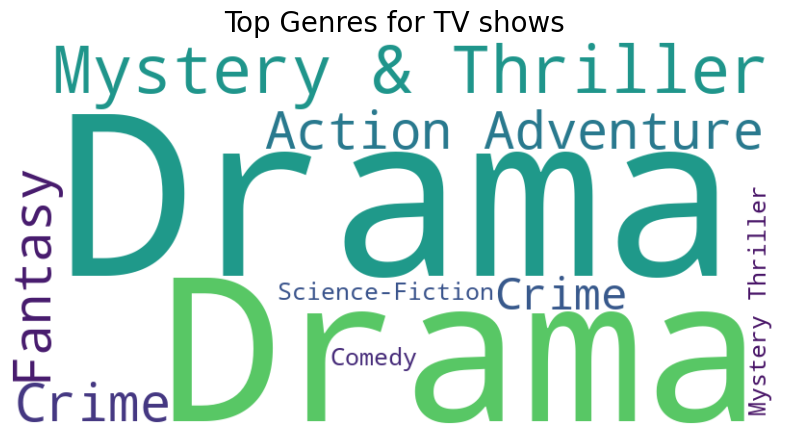

In [24]:
def generate_word_cloud(genre_counts, category):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(genre_counts)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Top Genres for {category}", fontsize=20)
    plt.axis('off')
    plt.show()

def main_with_visualization():
    # File paths
    movies_file_path = 'justwatch_movies.csv'
    tv_shows_file_path = 'justwatch_data(tv).csv'

    # Analyze top genres
    movie_genre_counts = analyze_top_genre(movies_file_path, 'movies')
    tv_genre_counts = analyze_top_genre(tv_shows_file_path, 'TV shows')

    # Generate and display word clouds
    if movie_genre_counts:
        generate_word_cloud(movie_genre_counts, 'movies')
    if tv_genre_counts:
        generate_word_cloud(tv_genre_counts, 'TV shows')

if __name__ == "__main__":
    main_with_visualization()


# **Task 3 :- Data Export**

In [30]:

from google.colab import files


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#saving final dataframe as Final Data in csv format
files.download('justwatch_data(tv).csv')
files.download('justwatch_movies.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Dataset Drive Link (View Access with Anyone) -**